In [83]:
import pandas as pd
import os
import glob
import re
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt

folder_data = '/home/irum/Desktop/API/data_analysis_walkins'

# Test DataFrame

In [84]:
def listdir_nohidden(path):
    return glob.glob(os.path.join(path, '*'))

In [148]:
df = pd.read_csv('/home/irum/Desktop/API/data_analysis_walkins/2019-05-17 00:00:001 day, 0:00:00_generate_predictions.csv')
columns_ = df.columns
df_test = pd.DataFrame(columns=columns_)

In [215]:
#df_test

In [150]:
short_listed_dates = ['2019-05-16', '2019-05-17']

In [151]:
# Test DataFrame
for csvs in listdir_nohidden(folder_data):
    print('CSV: ', csvs)
    df = pd.read_csv(csvs)
    # df_test = df_test.append(pd.Series(df.iloc[-1], index=df.columns ), ignore_index=True)
    short_listed_df = df[df['Date'].isin(short_listed_dates)]
    df_test = df_test.append(short_listed_df)
    

CSV:  /home/irum/Desktop/API/data_analysis_walkins/2019-05-27 00:00:001 day, 0:00:00_generate_predictions.csv
CSV:  /home/irum/Desktop/API/data_analysis_walkins/2019-05-19 00:00:001 day, 0:00:00_generate_predictions.csv
CSV:  /home/irum/Desktop/API/data_analysis_walkins/2019-05-26 00:00:001 day, 0:00:00_generate_predictions.csv
CSV:  /home/irum/Desktop/API/data_analysis_walkins/2019-05-18 00:00:001 day, 0:00:00_generate_predictions.csv
CSV:  /home/irum/Desktop/API/data_analysis_walkins/2019-05-25 00:00:001 day, 0:00:00_generate_predictions.csv
CSV:  /home/irum/Desktop/API/data_analysis_walkins/2019-05-17 00:00:001 day, 0:00:00_generate_predictions.csv
CSV:  /home/irum/Desktop/API/data_analysis_walkins/2019-05-21 00:00:001 day, 0:00:00_generate_predictions.csv
CSV:  /home/irum/Desktop/API/data_analysis_walkins/2019-05-22 00:00:001 day, 0:00:00_generate_predictions.csv
CSV:  /home/irum/Desktop/API/data_analysis_walkins/2019-05-28 00:00:001 day, 0:00:00_generate_predictions.csv
CSV:  /hom

In [216]:
#df_test.shape

In [155]:
df_test.describe()

,walkinHourCustomers,closedFreqHour,closedCustomersHour,bigEvent,blockbusterRelease,closingShift,endTime,endTimeMinutes,highTrafficDay,lowTrafficDay,...,logWalkinCustomersLag4,logWalkinCustomersLag5,logWalkinCustomersLag6,logWalkinCustomersLag7,logWalkinCustomersLag14,logWalkinCustomersLag21,logWalkinCustomersLag28,AdjWalkinHourCustomers,PREV_walkinHourCustomers,7_day_prev_week_day
count,672.000000,672.000000,672.000000,672.0,672.0,672.00000,672.000000,672.0,672.0,672.0,...,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,3.726190,0.270833,7.083333,0.0,0.0,5.43750,5.708333,0.0,0.0,0.0,...,-0.087027,-0.403820,-0.319345,-0.140907,-0.049225,-0.079633,-0.379586,4.398810,2.354167,4.416667
std,7.733799,0.568299,14.438488,0.0,0.0,8.94372,9.387727,0.0,0.0,0.0,...,1.088793,1.144783,1.088215,0.962707,1.047058,0.945589,1.120568,9.699288,5.043139,9.358511
min,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,-8.131531,-10.154246,-10.328755,-9.449357,-9.803667,-9.259131,-10.232791,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.000000,-0.697046,-0.749843,0.000000,0.000000,0.000000,-0.775591,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.0,0.0,19.00000,20.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,26.000000,2.000000,40.000000,0.0,0.0,21.00000,22.000000,0.0,0.0,0.0,...,1.325670,0.000000,0.000000,0.007843,0.798508,0.198070,0.000000,48.000000,22.000000,42.000000


## Train DataFrame

In [96]:
trainingcsv_data = '/home/irum/Desktop/API/train_models.csv'

In [97]:
df_train = pd.read_csv(trainingcsv_data)

In [217]:
#print(len(df_test.columns))
#print(len(df_train.columns))

In [160]:
#def intersection(lst1, lst2): 
    #return set(lst1).intersection(lst2) 

In [159]:
#common_columns = intersection(df_train.columns,df_test.columns)
#print(common_columns)

In [157]:
df_train.describe()

,Hour,hour,walkinHourCustomers,closedFreqHour,closedCustomersHour,bigEvent,blockbusterRelease,closingShift,endTime,endTimeMinutes,...,logWalkinCustomersLag21,logWalkinCustomersLag28,month,AdjWalkinHourCustomers,weekday_c,typeOfDay_c,bmark,hourF,PREV_walkinHourCustomers,7_day_prev_week_day
count,4056.00000,4056.000000,4056.000000,4056.000000,4056.000000,4056.0,4056.000000,4056.000000,4056.000000,4056.0,...,4056.000000,4056.000000,4056.000000,4056.000000,4056.000000,4056.000000,4056.000000,4056.00000,4056.000000,4056.000000
mean,11.50000,5.019724,8.712032,0.364152,5.121302,0.0,0.004684,6.426282,6.754438,0.0,...,0.013914,0.003406,1.365631,9.124260,1.443787,2.459073,1.863412,11.50000,8.723373,8.654339
std,6.92304,7.422006,18.428116,1.190297,17.194559,0.0,0.068291,9.220065,9.688508,0.0,...,0.684444,0.681760,2.728973,19.063897,2.365660,3.694873,6.618703,6.92304,18.425721,18.349541
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,-9.047821,-7.901007,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5.75000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.75000,0.000000,0.000000
50%,11.50000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.50000,0.000000,0.000000
75%,17.25000,13.000000,7.000000,0.000000,0.000000,0.0,0.000000,19.000000,20.000000,0.0,...,0.000000,0.000000,2.000000,8.000000,2.000000,7.000000,0.000000,17.25000,7.000000,7.000000
max,23.00000,21.000000,142.000000,12.000000,165.000000,0.0,1.000000,21.000000,22.000000,0.0,...,2.911226,3.306887,12.000000,142.000000,7.000000,9.000000,47.000000,23.00000,142.000000,142.000000


In [103]:
df_train.shape

(4056, 49)

In [163]:
# train 
df_train_final = df_train[df_train['Date'].isin(short_listed_dates)]

In [166]:
df_train_final.shape

(48, 49)

In [178]:
len(df_train[df_train['Date'] == '2019-05-16'])

24

In [180]:
len(df_test[df_test['Date'] == '2019-05-16'])

336

In [167]:
#df_test.to_csv('test_df.csv')

In [218]:
#df_train.to_csv('train_df.csv')

## PLOTS

In [186]:
f_list = ['7_day_prev_week_day','month','typeOfDay_c','weekday_c','schoolBreak','schoolBreak1W','lowTrafficDay','highTrafficDay',
'nationalHoliday','bigEvent','blockbusterRelease','logWalkinCustomersLag1','logWalkinCustomersLag2','logWalkinCustomersLag3',
'logWalkinCustomersLag4','logWalkinCustomersLag5','logWalkinCustomersLag6','logWalkinCustomersLag7',
'logWalkinCustomersLag14','logWalkinCustomersLag21','logWalkinCustomersLag28','logClosedCustomersLag1',
'logClosedCustomersLag2','logClosedCustomersLag3','logClosedCustomersLag4','logClosedCustomersLag5',
'logClosedCustomersLag6','logClosedCustomersLag7','logClosedCustomersLag14','logClosedCustomersLag21','logClosedCustomersLag28']

## df_test: 
    shape: (672, 48)
    rows where 'Date' == ['2019-05-16', '2019-05-17']
## df_train:
    shape: (4056, 49)
    all rows, all dates
## df_train_final:
    shape: (48, 49)
    rows where 'Date' == ['2019-05-16', '2019-05-17']
    subset of df_train

# Histograms TEST

An Exception Occured While Plotting a Histogram for month. Details num must be 1 <= num <= 0, not 1
An Exception Occured While Plotting a Histogram for typeOfDay_c. Details num must be 1 <= num <= 0, not 1
An Exception Occured While Plotting a Histogram for weekday_c. Details num must be 1 <= num <= 0, not 1


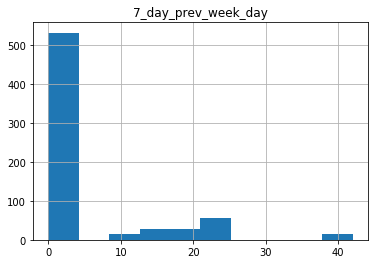

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

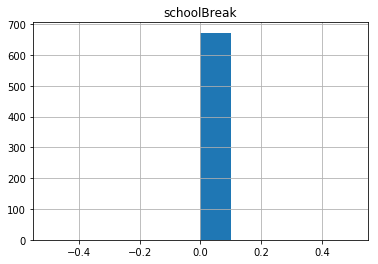

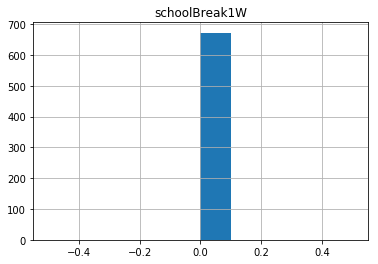

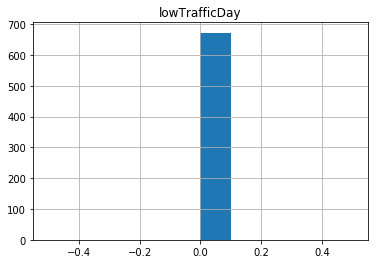

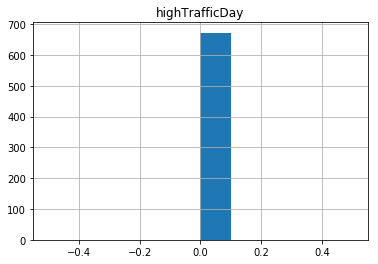

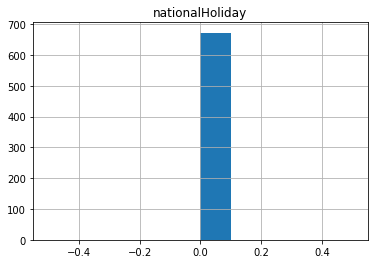

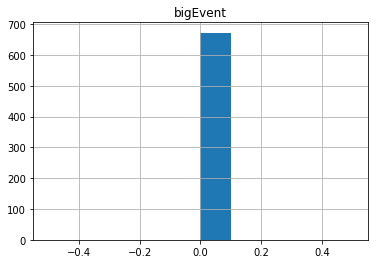

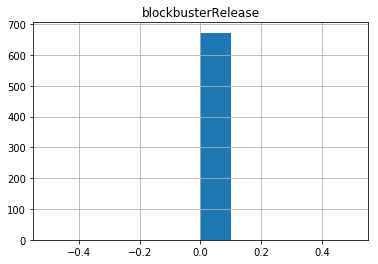

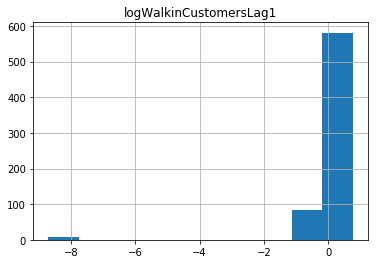

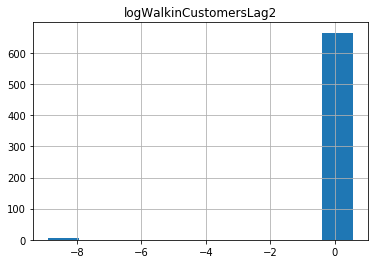

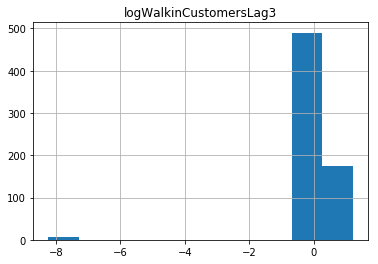

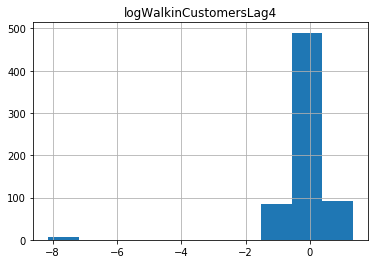

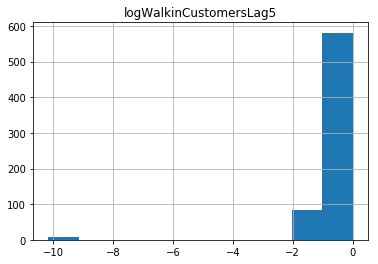

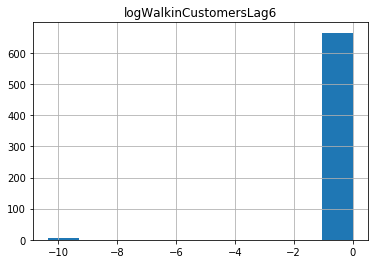

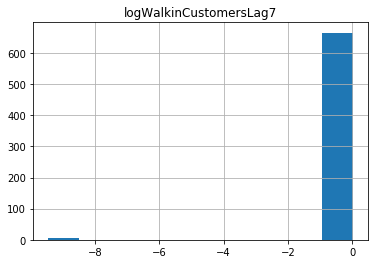

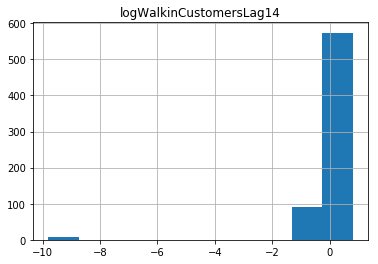

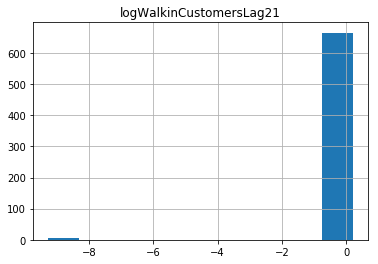

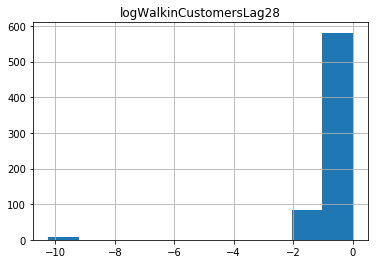

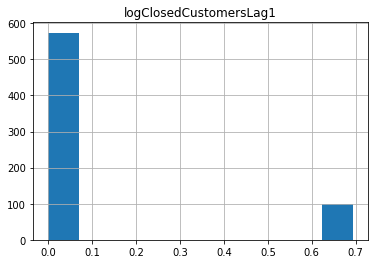

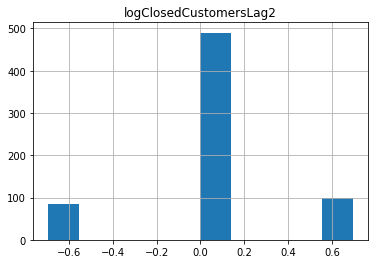

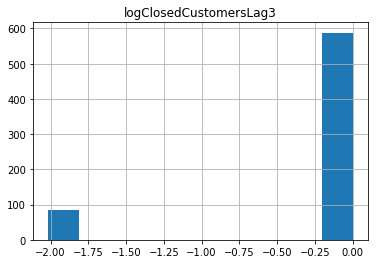

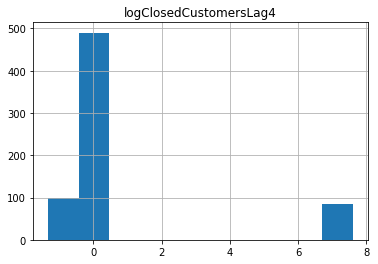

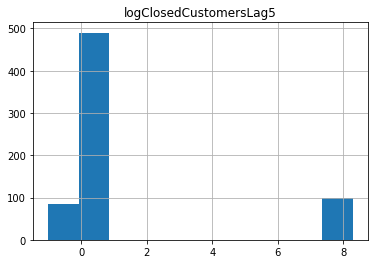

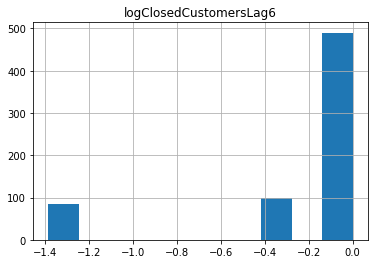

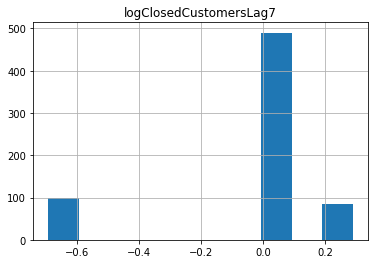

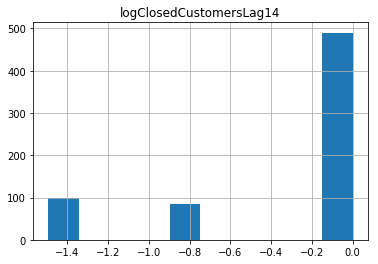

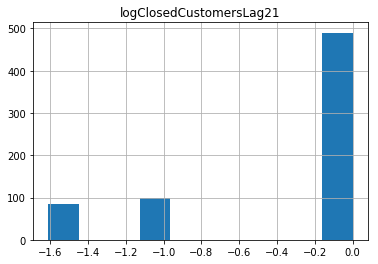

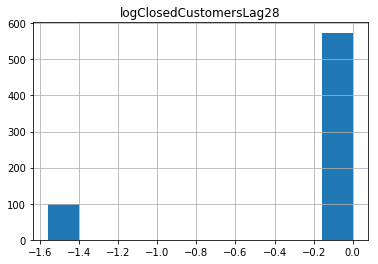

In [240]:
for name in f_list:
        try:
            df_test.hist(column = name)
        except Exception as e:
            print('An Exception Occured While Plotting a Histogram for {}. Details: {}'.format(name,str(e)))

# Histograms Train (df_train)

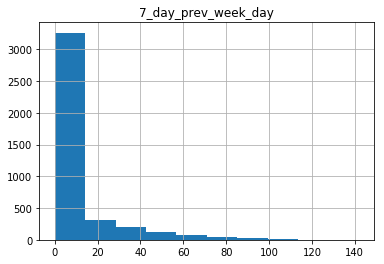

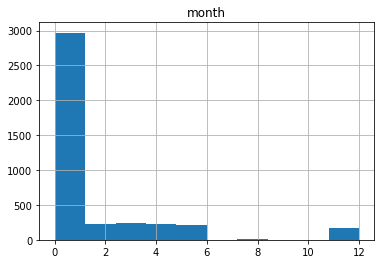

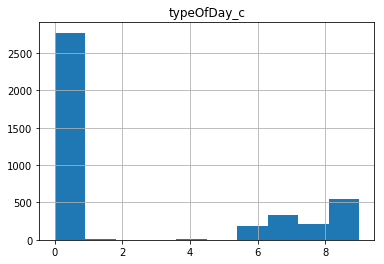

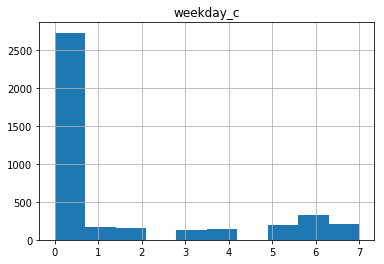

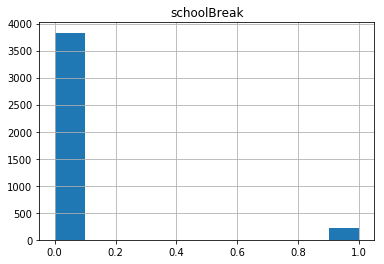

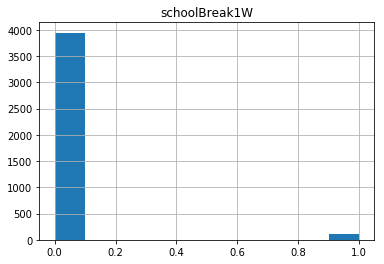

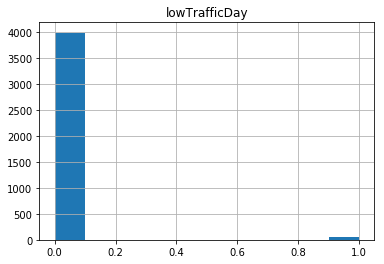

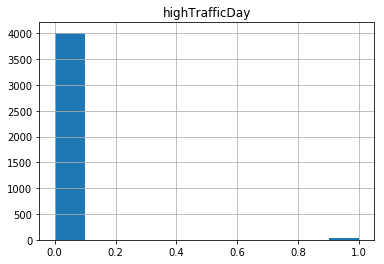

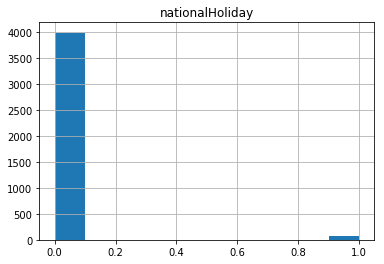

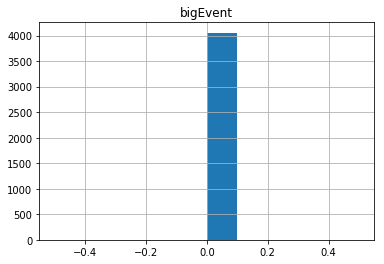

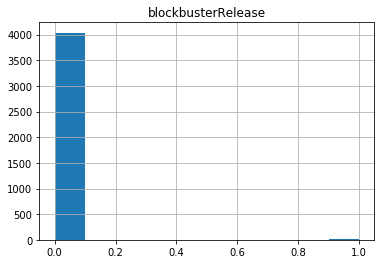

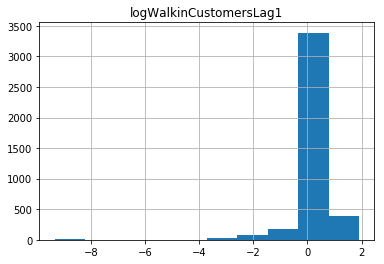

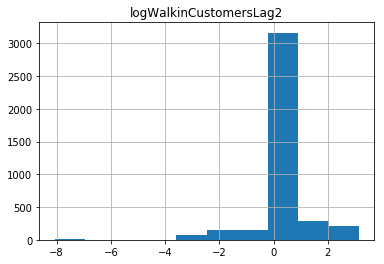

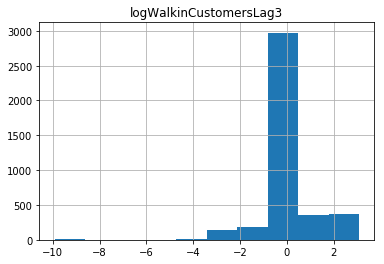

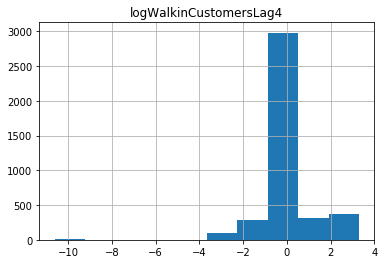

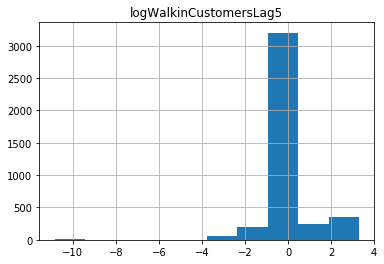

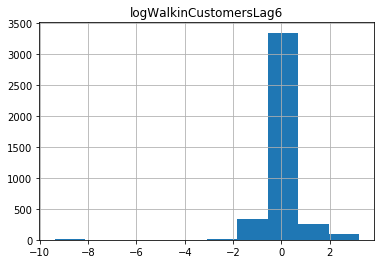

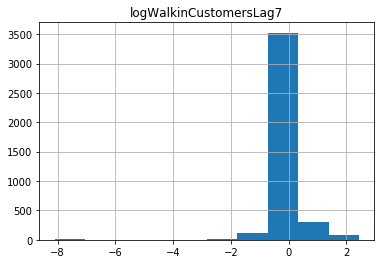

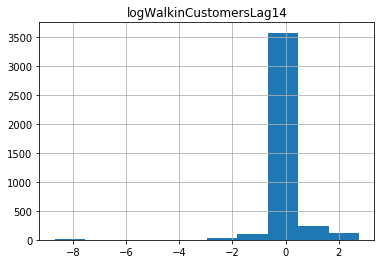

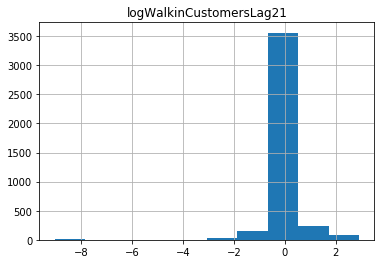

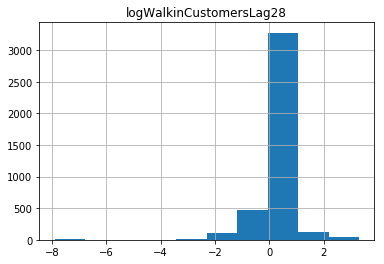

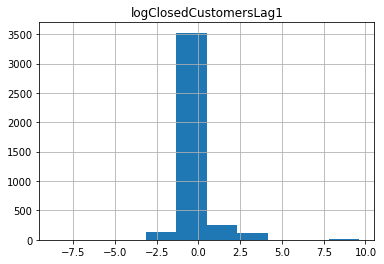

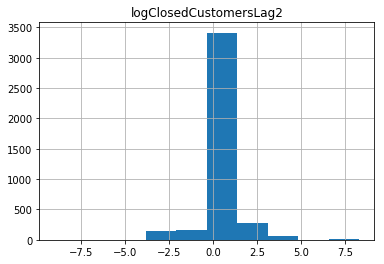

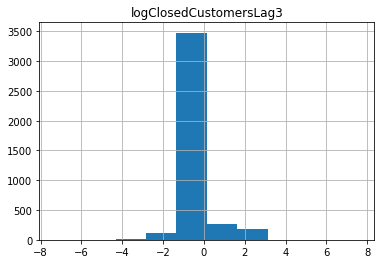

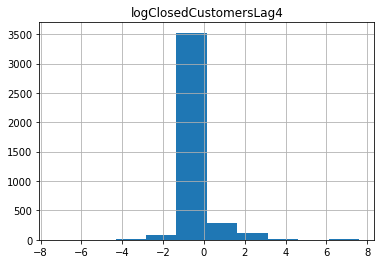

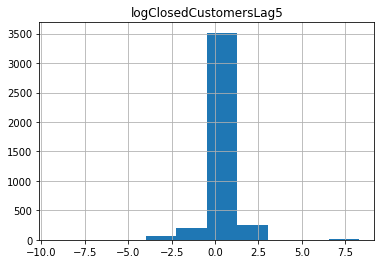

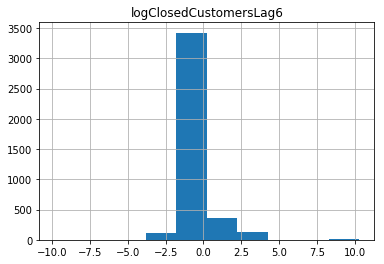

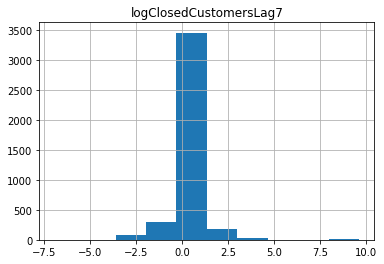

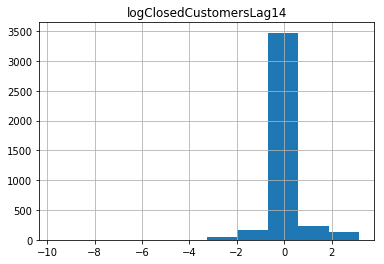

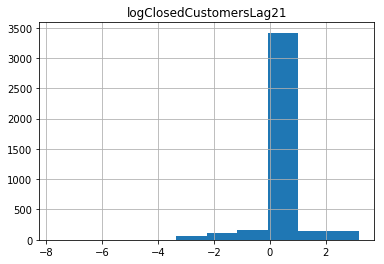

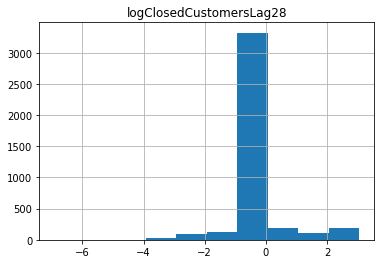

In [242]:
for name in f_list:
        try:
            df_train.hist(column = name)
        except Exception as e:
            print('An Exception Occured While Plotting a Histogram for {}. Details {}'.format(name,str(e)))

# Histograms Train (df_train_final)

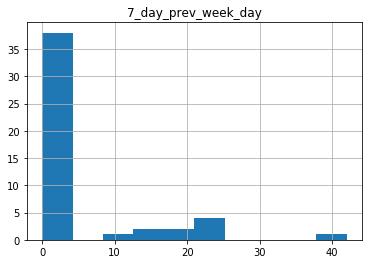

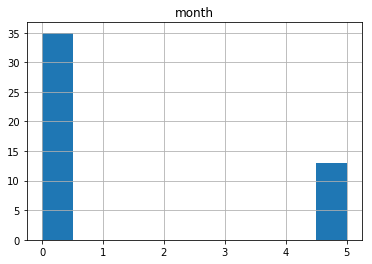

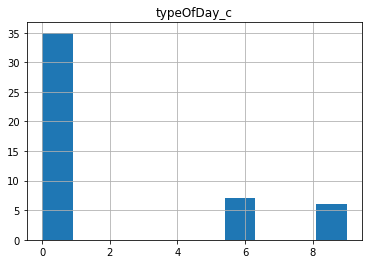

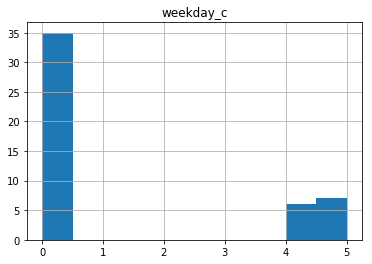

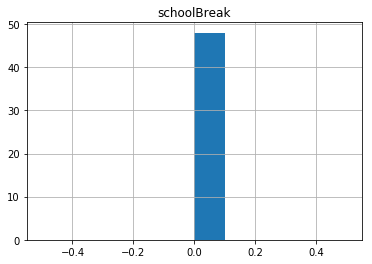

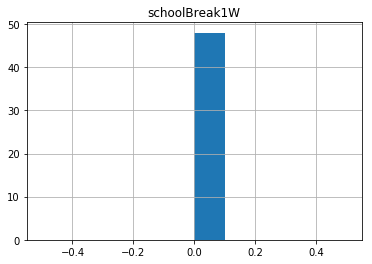

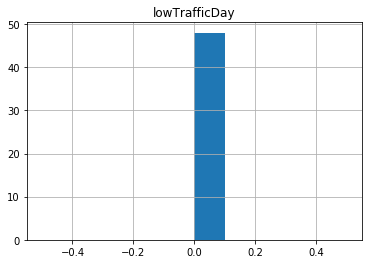

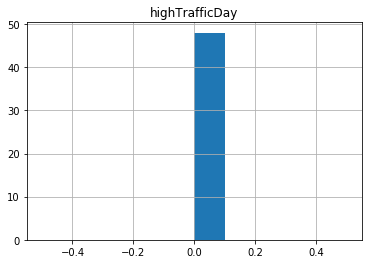

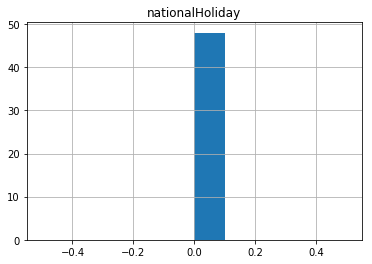

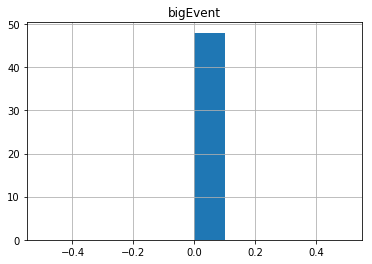

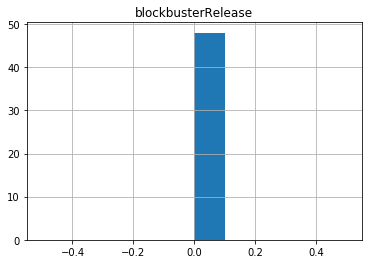

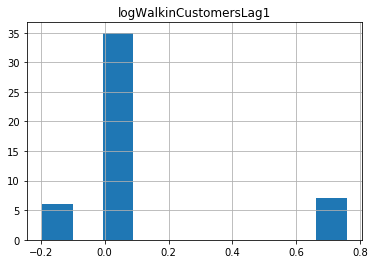

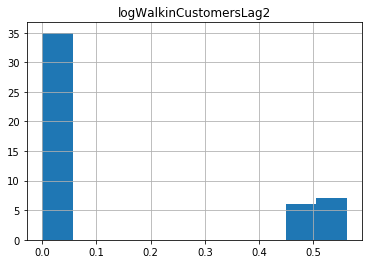

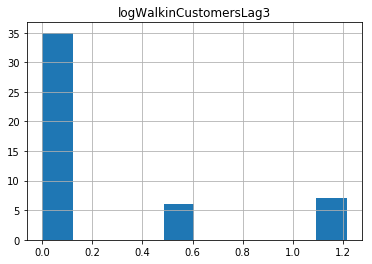

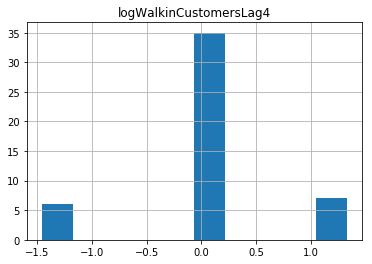

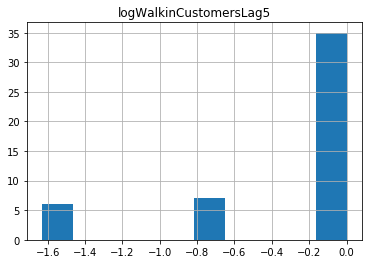

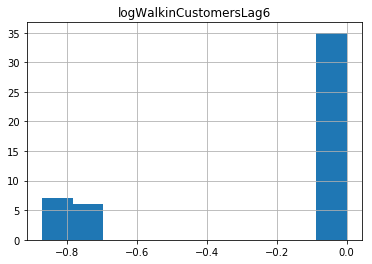

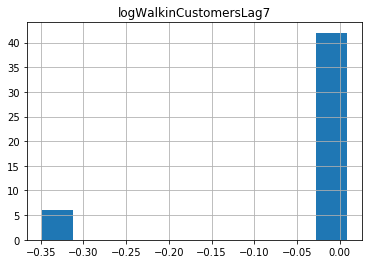

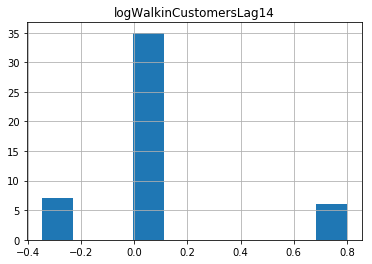

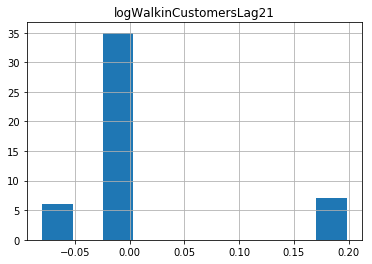

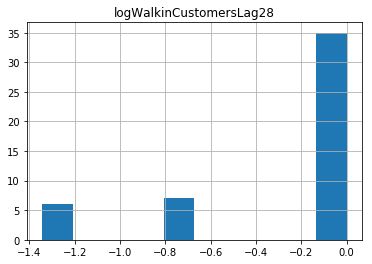

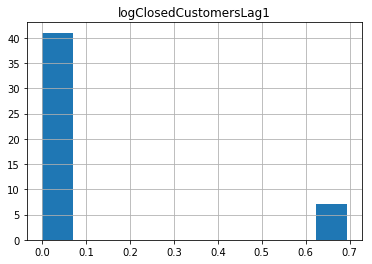

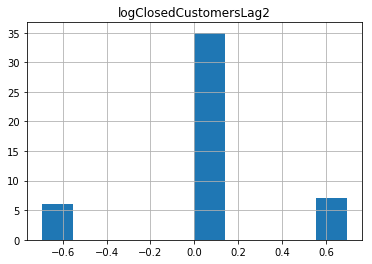

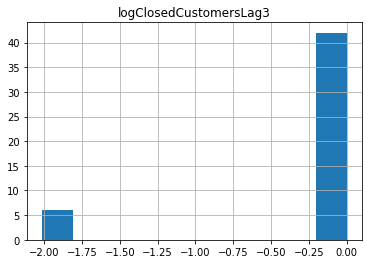

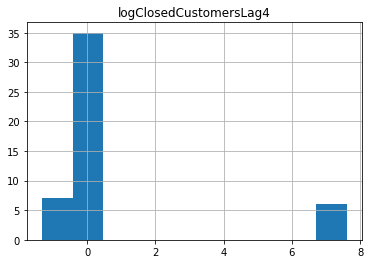

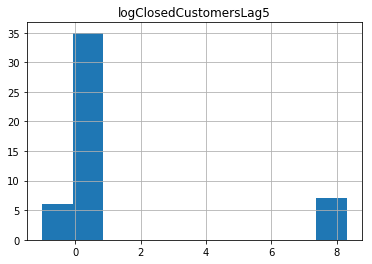

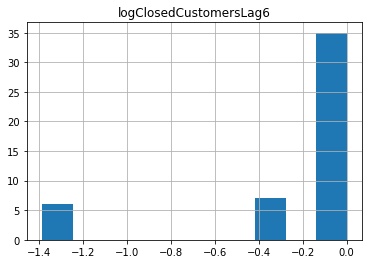

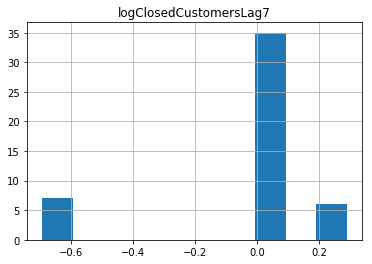

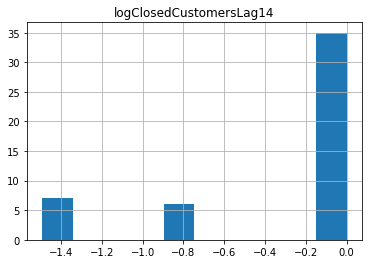

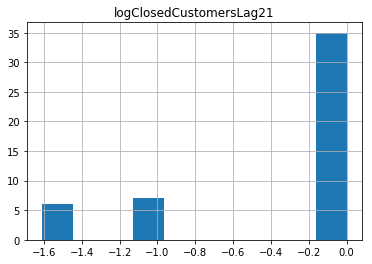

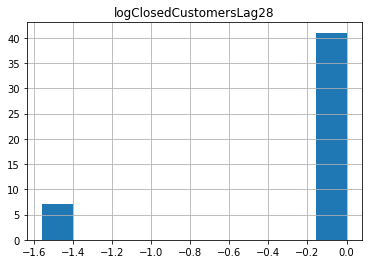

In [243]:
for name in f_list:
        try:
            df_train_final.hist(column = name)
        except Exception as e:
            print('An Exception Occured While Plotting a Histogram for {}. Details {}'.format(name,str(e)))